## Fire up GraphLab create

In [6]:
import graphlab

## Load some house sales data

In [7]:
sales = graphlab.SFrame('home_data.csv')

Finished parsing file C:\Users\Edward\Anaconda2\Scripts\Demo\home_data.csv

Parsing completed. Parsed 100 lines in 0.161009 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,str,long,long,float,long,long,float,long,long,long,long,long,long,long,long,long,float,float,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\Edward\Anaconda2\Scripts\Demo\home_data.csv

Parsing completed. Parsed 21613 lines in 0.106006 secs.

In [8]:
sales

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: 21613

Data:
+------------+-----------------+---------+----------+-----------+-------------+
|     id     |       date      |  price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+---------+----------+-----------+-------------+
| 7129300520 | 20141013T000000 |  221900 |    3     |    1.0    |     1180    |
| 6414100192 | 20141209T000000 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 20150225T000000 |  180000 |    2     |    1.0    |     770     |
| 2487200875 | 20141209T000000 |  604000 |    4     |    3.0    |     1960    |
| 1954400510 | 20150218T000000 |  510000 |    3     |    2.0    |     1680    |
| 7237550310 | 20140512T000000 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 20140627T000000 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 20150115T000000 |  291850 |    3     |    1.5    |     1060    |
| 2414600126 | 20150415T000000 |  229500 |    3     |    1.0    |     1780    |
| 3793500160 | 20150312T000000 |  323000 |    3     |    2.5    |     1890    |
+------------+-----------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |  1.0   |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |  2.0   |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |  1.0   |     0      |  0   |     3     |   6   |    770     |       0       |
|   5000   |  1.0   |     0      |  0   |     5     |   7   |    1050    |      910      |
|   8080   |  1.0   |     0      |  0   |     3     |   8   |    1680    |       0       |
|  101930  |  1.0   |     0      |  0   |     3     |   11  |    3890    |      1530     |
|   6819   |  2.0   |     0      |  0   |     3     |   7   |    1715    |       0       |
|   9711   |  1.0   |     0      |  0   |     3     |   7   |    1060    |       0       |
|   7470   |  1.0   |     0      |  0   |     3     |   7   |    1050    |      730      |
|   6560   |  2.0   |     0      |  0   |     3     |   7   |    1890    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+----------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long   | sqft_living15 | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
|   1955   |      0       |  98178  | 47.5112 | -122.257 |      1340     | ... |
|   1951   |     1991     |  98125  |  47.721 | -122.319 |      1690     | ... |
|   1933   |      0       |  98028  | 47.7379 | -122.233 |      2720     | ... |
|   1965   |      0       |  98136  | 47.5208 | -122.393 |      1360     | ... |
|   1987   |      0       |  98074  | 47.6168 | -122.045 |      1800     | ... |
|   2001   |      0       |  98053  | 47.6561 | -122.005 |      4760     | ... |
|   1995   |      0       |  98003  | 47.3097 | -122.327 |      2238     | ... |
|   1963   |      0       |  98198  | 47.4095 | -122.315 |      1650     | ... |
|   1960   |      0       |  98146  | 47.5123 | -122.337 |      1780     | ... |
|   2003   |      0       |  98038  | 47.3684 | -122.031 |      2390     | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
[21613 rows x 21 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and col

## Exploring the data for housing sales

In [9]:
graphlab.canvas.set_target('ipynb') #将目标设置在 ipython nodebook 不用默认的浏览器

In [14]:
sales.show(view="Scatter Plot", x="sqft_living", y="price") #散点图的形式显示

## Create a simple regression model of sqft_ling to price

In [15]:
train_data, test_data = sales.random_split(.8,seed=0) #通过 random_split方法将数据分为训练集和测试集，有相同seed的值，结果是一样的

### Build the regression mode

In [16]:
sqft_mode = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living']) #自动选取了Newton Method，除非自行指定算法

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16496

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.015058     | 4325822.809602     | 2036725.206812       | 264345.496695 | 235606.737917   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

### Evaluate the simple model

In [17]:
print test_data['price'].mean() #计算测试数据中房价的平均值

543054.042563


In [18]:
print sqft_mode.evaluate(test_data) #max_error 最大误差，异常值， rmse 均方根误差 root mean square error

{'max_error': 4124789.498159544, 'rmse': 255238.79984273756}


## Let's show what our predictions look like

In [19]:
import matplotlib.pyplot as plt #%matplotlib inline 内部打印

In [20]:
%matplotlib inline 

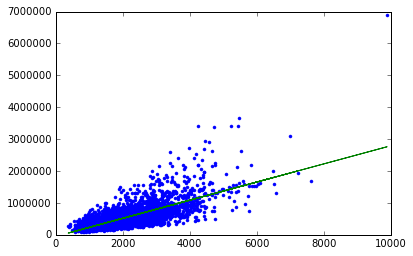

In [21]:
plt.plot(test_data['sqft_living'], test_data['price'], '.',
         test_data['sqft_living'], sqft_mode.predict(test_data),'-') #使用matplotlib.pyplot画两个图，一个是实际值，一个是预测值

In [22]:
sqft_mode.get('coefficients') #获取相关系数

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -50961.0490089 | 5079.05415642 |
| sqft_living |  None | 284.243837295  | 2.23039357322 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

## Explore other features in the data

In [23]:
my_features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [24]:
sales[my_features].show()

In [25]:
sales.show(view='BoxWhisker Plot',x="zipcode",y='price') #箱须图

## Build a regression model with more feature

In [26]:
my_feature_model = graphlab.linear_regression.create(train_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16461

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.024001     | 4101697.415536     | 2277871.441296       | 256298.951214 | 276879.432651   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [27]:
print sqft_mode.evaluate(test_data)
print my_feature_model.evaluate(test_data)

{'max_error': 4124789.498159544, 'rmse': 255238.79984273756}
{'max_error': 3990523.4903922062, 'rmse': 252830.2249481518}


## Apply learned models to predict prices of 3 houses

In [28]:
house1 = sales[sales['id']==5309101200]

In [29]:
house1

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: Unknown

Data:
+------------+-----------------+--------+----------+-----------+-------------+
|     id     |       date      | price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+--------+----------+-----------+-------------+
| 5309101200 | 20140605T000000 | 620000 |    4     |    2.25   |     2400    |
+------------+-----------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+---------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long  | sqft_living15 | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
|   1929   |      0       |  98117  | 47.6763 | -122.37 |      1250     | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [30]:
print house1['price']

[620000L, ... ]


In [31]:
print sqft_mode.predict(house1)

[631224.1604995189]


In [32]:
print my_feature_model.predict(house1)

[610656.8328282144]


# Homework

In [33]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [41]:
home_mode = graphlab.linear_regression.create(train_data, target='price', features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 19

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.036002     | 4313845.796148     | 202879.786275 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [42]:
print home_mode.coefficients

+-------------+-------+----------------+-----------------+
|     name    | index |     value      |      stderr     |
+-------------+-------+----------------+-----------------+
| (intercept) |  None | -18754624.5463 |  3295192.75142  |
|   bedrooms  |  None | -38874.1472252 |  2220.02713604  |
|  bathrooms  |  None | 42835.8207278  |  3664.69905725  |
| sqft_living |  None | 79.0846479452  |  30316619.4386  |
|   sqft_lot  |  None | 0.140021128014 | 0.0545182495734 |
|    floors   |  None | 3168.68357486  |  4045.58996843  |
|   zipcode   |  None | -121.797257061 |  36.9783223031  |
|  condition  |  None | 27791.6188075  |  2651.48696056  |
|    grade    |  None | 103117.586455  |   2424.626272   |
|  waterfront |  None | 610475.849515  |  19430.1709061  |
+-------------+-------+----------------+-----------------+
[19 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [43]:
sales.show(view='BoxWhisker Plot',x="zipcode",y='price') #箱须图

In [44]:
sales['sqft_living'].show()

In [45]:
print my_feature_model.evaluate(test_data)
print home_mode.evaluate(test_data)

{'max_error': 3990523.4903922062, 'rmse': 252830.2249481518}
{'max_error': 4104391.8703562953, 'rmse': 199908.40407387982}


In [46]:
print my_feature_model.evaluate(train_data)
print home_mode.evaluate(train_data)

{'max_error': 4101697.415535843, 'rmse': 257433.03057952248}
{'max_error': 4313845.796148293, 'rmse': 202879.78627458267}
